### Importar as lib's

In [41]:
# Lib's
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import plot_roc_curve
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import metrics

### Importar o dataset somente com as colunas que preciso

In [42]:
data = pd.read_csv('master.csv', usecols=['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'cod_pais', 'faixa_etaria'])

### Renomear o nome das colunas para ficar mais facil de trabalhar

In [43]:
dados = {
    
    'pais': data['country'],
    'ano': data['year'],
    'sexo': data['sex'],
    'idade': data['age'],
    'num_suicidio': data['suicides_no'],
    'populacao': data['population'],
    'suicidio_por_hab': data['suicides/100k pop'],
    'cod_pais' : data['cod_pais'],
    'faixa_etaria' : data['faixa_etaria']
}

### Atualizando o nome das colunas no dataset

In [44]:
data = pd.DataFrame(dados)

### Normalizando a coluna de sexo de string para numerico

In [45]:
data['sexo'] = data['sexo'].replace('male',0)
data['sexo'] = data['sexo'].replace('female',1)

### Fazendo a divisão de dados para treino e para teste

In [16]:
atributos=data[['cod_pais',  'faixa_etaria', 'ano', 'num_suicidio']] 
classes=data['sexo'] 

X_train, X_test, y_train, y_test = train_test_split(atributos, classes, test_size=0.8) # 40% training and 60% test

### Treinando o modelo Random Forest e plotando um grafico de curva ROC para o resultado

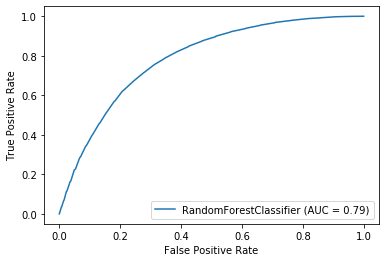

In [17]:
## RandomForest

rfc=RandomForestClassifier(n_estimators=30)  
#n_estimators é a quantidade de árvores que o algoritmo deve tentar gerar


rfc.fit(X_train,y_train) #construção do modelo

rfc_disp = plot_roc_curve(rfc, X_test, y_test)

### Treinando o modelo SVM e plotando um grafico de curva ROC para o resultado

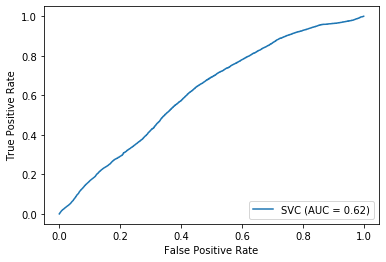

In [18]:
## SVC


svc = SVC()
svc.fit(X_train, y_train)

ax = plt.gca()

svc_disp = plot_roc_curve(svc, X_test, y_test,  ax=ax)

### Treinando o modelo Neural Network e plotando um grafico de curva ROC para o resultado

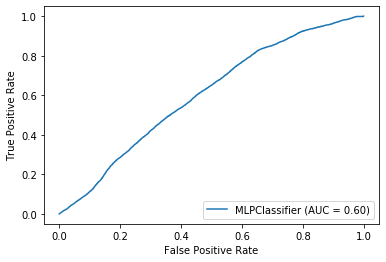

In [19]:
## RN

rn = MLPClassifier( hidden_layer_sizes=(5,2),max_iter=5000)

rn.fit(X_train, y_train)

ax = plt.gca()

rn_disp = plot_roc_curve(rn, X_test, y_test,  ax=ax)


### Treinando o modelo Naive Bayes e plotando um grafico de curva ROC para o resultado

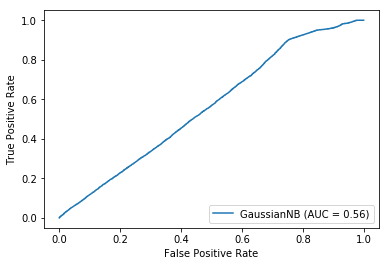

In [49]:
nb = GaussianNB()
nb.fit(X_train, y_train)

ax = plt.gca()
nb_disp = plot_roc_curve(nb, X_test, y_test,  ax=ax)

### Plotando um comparativo de todos os modelos

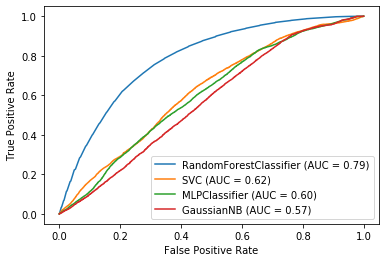

In [20]:
ax = plt.gca()

rfc_disp.plot(ax=ax)
svc_disp.plot(ax=ax)
rn_disp.plot(ax=ax)
nb_disp.plot(ax=ax)

### Apresentando a taxa de eficiencia do modelo Random Forest em relação aos acertos e aos erros.

In [26]:
   
taxa_falsoPositivo, taxa_verdadeiroPositivo, limiares = metrics.roc_curve(y_test, rfc.predict(X_test))
print(metrics.auc(taxa_falsoPositivo, taxa_verdadeiroPositivo))

limiares

0.718414509893977


array([2, 1, 0])

### Apresentando a taxa de eficiencia do modelo SVM em relação aos acertos e aos erros.

In [22]:
taxa_falsoPositivo, taxa_verdadeiroPositivo, limiares = metrics.roc_curve(y_test, svc.predict(X_test))
print(metrics.auc(taxa_falsoPositivo, taxa_verdadeiroPositivo))

limiares

0.5814129689639523


array([2, 1, 0])

### Apresentando a taxa de eficiencia do modelo Neutral Network em relação aos acertos e aos erros.

In [57]:
taxa_falsoPositivo, taxa_verdadeiroPositivo, limiares = metrics.roc_curve(y_test, rn.predict(X_test))
print(metrics.auc(taxa_falsoPositivo, taxa_verdadeiroPositivo))

limiares

0.510222123220554


array([2, 1, 0], dtype=int64)

### Apresentando a taxa de eficiencia do modelo Naive Bayes Network em relação aos acertos e aos erros.

In [24]:
taxa_falsoPositivo, taxa_verdadeiroPositivo, limiares = metrics.roc_curve(y_test, nb.predict(X_test))
print(metrics.auc(taxa_falsoPositivo, taxa_verdadeiroPositivo))

limiares

array([2, 1, 0])